In [14]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics.pairwise import pairwise_kernels
from scipy.optimize import fmin_l_bfgs_b
from sklearn.datasets.samples_generator import make_blobs
from scipy.linalg import cholesky, cho_solve, solve_triangular
from scipy.spatial.distance import pdist, squareform
from sklearn.gaussian_process import GaussianProcessRegressor, GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

In [2]:
sigma_n_square = 1e-10

### Create fake dataset

In [3]:
# create fake dataset
X_data, y_data = make_blobs(n_samples=10, centers=2, n_features=2, random_state=10) # 26
y_data[y_data==0] = -1

y_data = y_data.reshape(-1,1)

In [4]:
# number of dimension
D = X_data.shape[1]

In [5]:
X = X_data[:25,:]
y = y_data[:25]

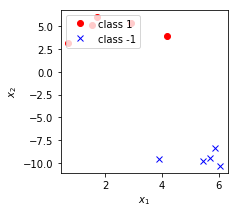

In [6]:
fig, ax = plt.subplots(figsize=(3,3))
ax.plot(X[y.flatten()==1][:, 0], X[y.flatten()==1][:,1], 'ro', label='class 1')
ax.plot(X[y.flatten()==-1][:, 0], X[y.flatten()==-1][:,1], 'bx', label = 'class -1')
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
#ax.set_xlim(-10, 10)
#ax.set_ylim(-5, 15)
ax.legend(loc='upper left')
plt.show()

### Learning

In [27]:
def my_kernel(X, Y):
    """
    We create a custom kernel:

                 (2  0)
    k(X, Y) = X  (    ) Y.T
                 (0  1)
    """
    M = np.array([[2, 0], [0, 1.0]])
    return np.dot(np.dot(X, M), Y.T)

In [26]:
my_kernel(X[0], y[0])

ValueError: shapes (2,) and (1,) not aligned: 2 (dim 0) != 1 (dim 0)

In [28]:
# Instantiate a Gaussian Process model
kernel = RBF(1, (1e-2, 1e2))
gp = GaussianProcessClassifier(kernel=my_kernel, n_restarts_optimizer=2)

In [29]:
%%time
# train GP model
gp.fit(X, y.flatten())

TypeError: Cannot clone object '<function my_kernel at 0x7f293c903378>' (type <class 'function'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' methods.

In [18]:
gp.kernel_

RBF(length_scale=5.11)

In [21]:
y_pred2 = gp.predict(X=X_data)

In [22]:
y_pred2

array([-1,  1,  1,  1, -1,  1, -1, -1, -1,  1])

In [23]:
sigma2

array([1.01887718e-05, 9.99770199e-06, 9.98893647e-06, 9.98339434e-06,
       1.01273207e-05, 9.98835294e-06, 1.01178446e-05, 1.02338925e-05,
       1.01847938e-05, 9.99158694e-06])